# Melbourne Housing Price Prediction

This project is for learning purposes only and was created as part of my Machine Learning Guide

Melbourne housing clearance data from Jan 2016 [Kaggle](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market)

### About Dataset

Update 06/08/2018 - Well it finally happened, Melbourne housing has cooled off. So here's your challenge; 1) when did it exactly happen? , 2) Could you see it slowing down? What were the variables that showed the slowing down (was it overall price, amount sold vs unsold, change in more rentals sold and less housing, changes in which CouncilArea or Region, more houses sold in distances further away from Melbourne CBD and less closer)? 3) Could you have predicted it (I'm not sure how you would do this, but I'm sure you magicians have a way that would make me think we should burn you for being a witch) 4) Should I hold off even longer in buying a two bedroom apartment in Northcote? <-- This is the real reason for me in publishing this dataset :)


### Import Libraries

In [1]:
# Import libraries and packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout             

import torch
import torch.nn as nn
import torch.nn.functional as F

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Read in data

In [2]:
# Read in csv
melbourne_df = pd.read_csv('../Data/Melbourne_housing_FULL.csv')
melbourne_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Exploratory Data Analysis

In [3]:
melbourne_df.shape

(34857, 21)

In [4]:
melbourne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
melbourne_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
melbourne_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [7]:
melbourne_df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
melbourne_df_na = (melbourne_df.isnull().sum() / len(melbourne_df)) * 100
melbourne_df_na = melbourne_df_na.drop(melbourne_df_na[melbourne_df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :melbourne_df_na})
missing_data.reset_index(inplace=True)
missing_data.rename(columns={'index': 'Feature'}, inplace=True)
missing_data

,Feature,Missing Ratio
0,BuildingArea,60.576068
1,YearBuilt,55.386293
2,Landsize,33.881286
3,Car,25.039447
4,Bathroom,23.599277
5,Bedroom2,23.573457
6,Lattitude,22.882061
7,Longtitude,22.882061
8,Price,21.832057
9,CouncilArea,0.008607


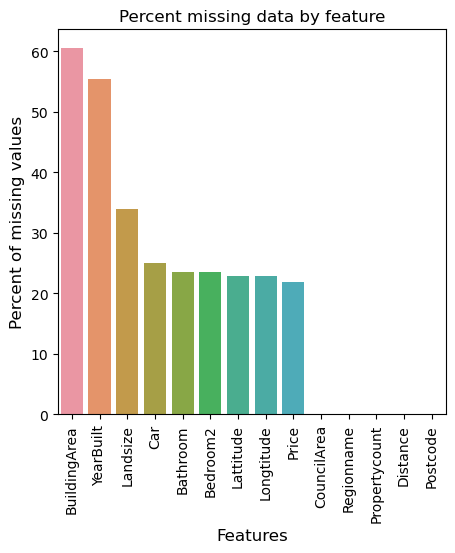

In [9]:
f, ax = plt.subplots(figsize=(5, 5))
plt.xticks(rotation='90')
sns.barplot(data=missing_data, x='Feature', y='Missing Ratio')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percent of missing values', fontsize=12)
plt.title('Percent missing data by feature', fontsize=12)
plt.savefig('Images/missing_features.png')

In [10]:
melbourne_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


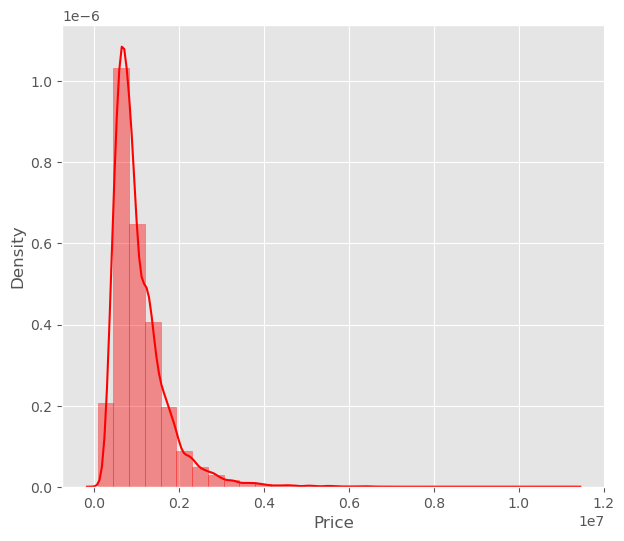

In [11]:
plt.figure(figsize=(7,6))
plt.style.use('ggplot')
sns.distplot(melbourne_df['Price'], bins=30, color="r", hist_kws=dict(edgecolor="r"))
plt.savefig('Images/price_dist_plot.png')
plt.show()

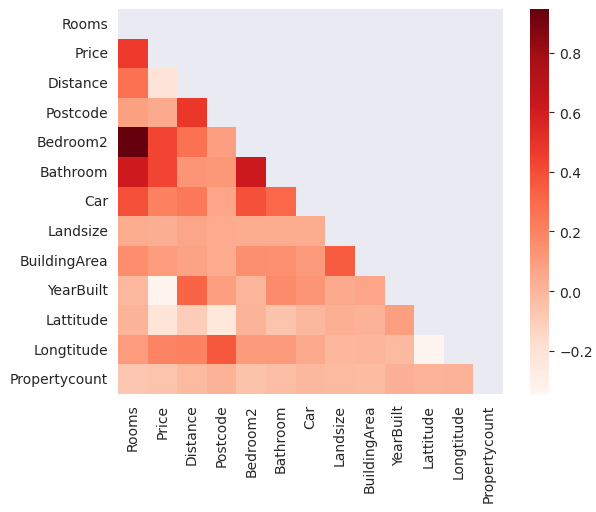

In [12]:
# Using Pearson Correlation to find relation between our target and features
corr = melbourne_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap='Reds')

plt.savefig('Images/price_corr.png') 


In [13]:
corr_target = abs(corr["Price"])
top_features = corr_target[corr_target>0.2]
top_features.sort_values(ascending=False)

Price        1.000000
Rooms        0.465238
Bedroom2     0.430275
Bathroom     0.429878
YearBuilt    0.333306
Lattitude    0.215607
Distance     0.211384
Car          0.201803
Name: Price, dtype: float64

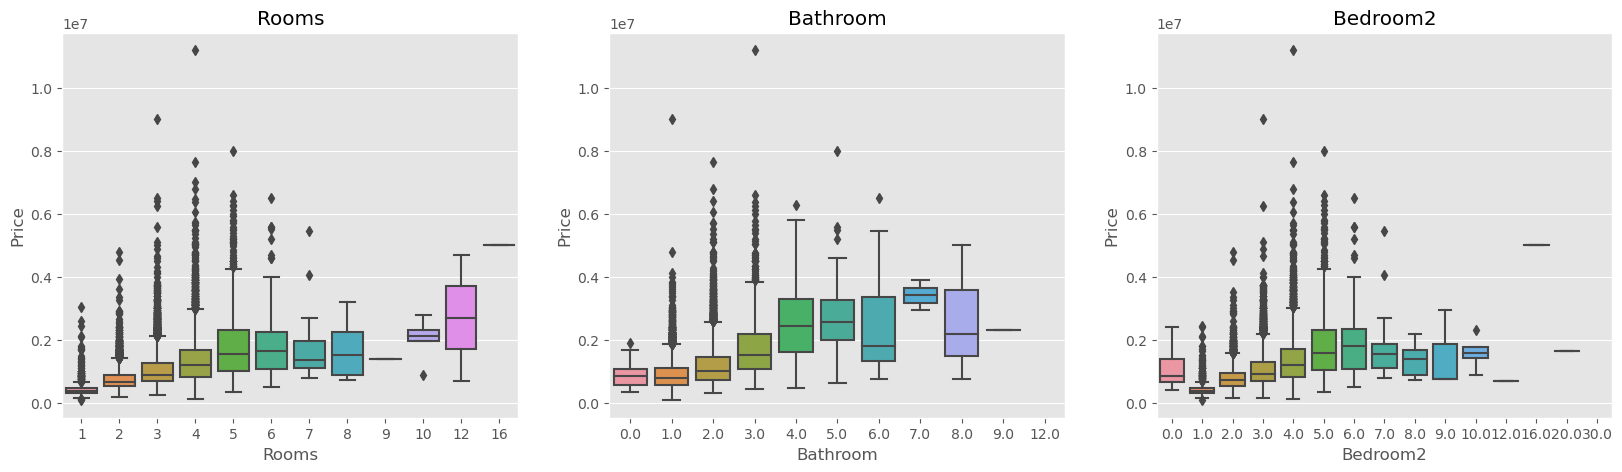

In [14]:
plt.figure(figsize=(20, 5))
plt.style.use('ggplot')

features = ['Rooms', 'Bathroom', 'Bedroom2']
target = melbourne_df['Price']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = melbourne_df[col]
    y = target
    sns.boxplot(data = melbourne_df, x=x, y=y)
    plt.title(col)
    plt.xlabel(col)

plt.savefig('Images/box_plots.png')

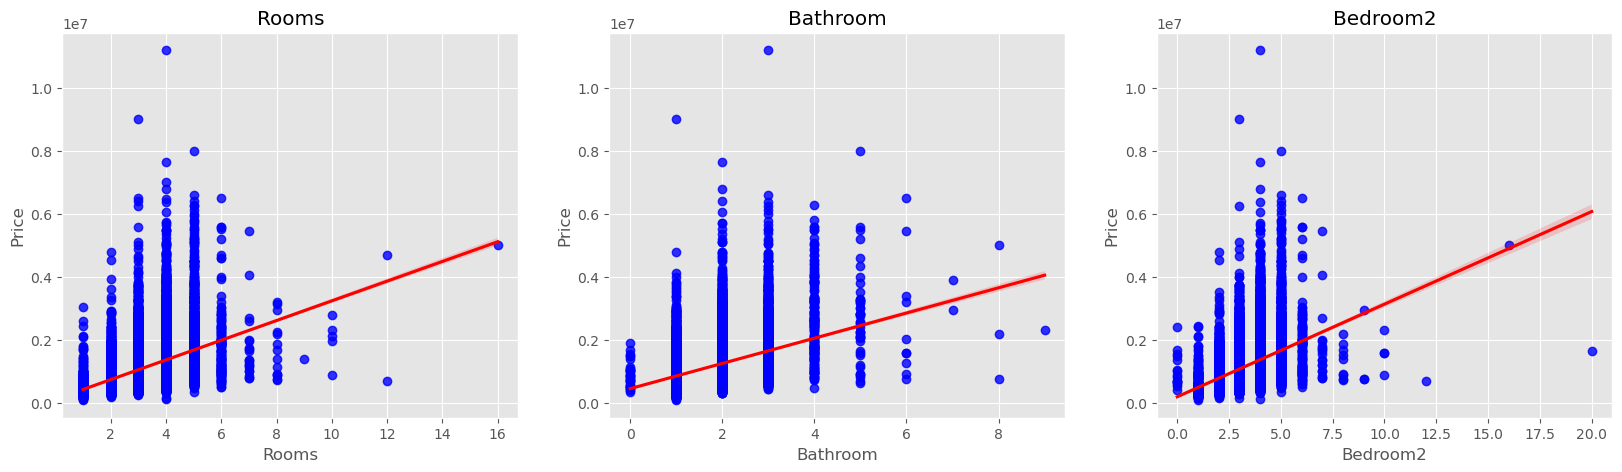

In [15]:
plt.figure(figsize=(20, 5))
plt.style.use('ggplot')

features = ['Rooms', 'Bathroom', 'Bedroom2']
target = melbourne_df['Price']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = melbourne_df[col]
    y = target
    sns.regplot(data=melbourne_df, x=x, y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title(col)
    plt.xlabel(col)

plt.savefig('Images/reg_plots.png')

###  Data Preprocessing

In [16]:
melbourne_features = melbourne_df.drop(['Price'],axis=1)
melbourne_features = melbourne_features[['Rooms', 'Bathroom', 'Bedroom2', 'Type', 'Distance', 'Car', 'Regionname']]

num_cols = [col for col in melbourne_features.columns if melbourne_features[col].dtype in ['float64','int64']]
cat_cols = [col for col in melbourne_features.columns if melbourne_features[col].dtype not in ['float64','int64']]


In [17]:
# Impute missing values with mean
melbourne_features[num_cols] = SimpleImputer().fit_transform(melbourne_features[num_cols])

# Encode categorical data
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(melbourne_features[cat_cols])
encoded_cols = list(encoder.get_feature_names(cat_cols))
melbourne_features[encoded_cols] = encoder.transform(melbourne_features[cat_cols])

In [18]:
melbourne_features.head()

,Rooms,Bathroom,Bedroom2,Type,Distance,Car,Regionname,Type_h,Type_t,Type_u,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Regionname_nan
0,2.0,1.0,2.0,h,2.5,1.0,Northern Metropolitan,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,2.0,h,2.5,1.0,Northern Metropolitan,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.0,2.0,h,2.5,0.0,Northern Metropolitan,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2.0,3.0,u,2.5,1.0,Northern Metropolitan,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2.0,3.0,h,2.5,0.0,Northern Metropolitan,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Select Target and Features 
X = melbourne_features[num_cols + encoded_cols]
y = melbourne_df.Price

y = y.fillna(y.mean())

## Model Selection and Prediction

Here we will go through several model selection and creation techniques

In [20]:
# Create training and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.20,
                                                 random_state=42)
# Scale numerical data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)                                           

In [21]:

# Create dictionary of models
models = {
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'Lasso':Lasso(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [22]:
# Store model result
model_results = []
model_names = []

# Train the models
for name,model in models.items():
    history = model.fit(X_train, y_train)
    predicted = history.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)
    
    # Create dataframe and print results
    df_results = pd.DataFrame([model_names, model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model', 1:'RMSE'}).sort_values(by='RMSE', ascending=False)
    
print(df_results)

                   Model           RMSE
0                    SVR   543550.30937
3             ElasticNet  499493.673141
8  DecisionTreeRegressor  465132.435817
9  RandomForestRegressor  426137.503925
5           SGDRegressor  423157.351264
2                  Ridge  420682.638439
4                  Lasso  420675.069805
6          BayesianRidge  420673.629729
7       LinearRegression  420547.624566
1           XGBRegressor  408521.520686


### Hyperpareter tuning: XGBRegressor using RandomSearchCV

In [23]:
import os
  
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 10


In [24]:
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1], 
              'max_depth': [2, 5, 10, 15],
              'min_child_weight': [10, 15, 20, 25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [10,50,100,200],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]}

xgb_model = XGBRegressor(random_state=42)

xgb_model_cv = RandomizedSearchCV(estimator=xgb_model, 
                                param_distributions = parameters, 
                                cv=4, n_iter=10, 
                                scoring='neg_mean_absolute_error',
                                verbose=1,
                                n_jobs=11)
history = xgb_model_cv.fit(X_train, y_train)

print("-"*100)
print("Best parameters found: ", xgb_model_cv.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(xgb_model_cv.best_score_)))



Fitting 4 folds for each of 10 candidates, totalling 40 fits
[15:21:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:21:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such 

In [25]:
xgb_model = XGBRegressor(**xgb_model_cv.best_params_, random_state=42)

xgb_model.fit(X_train, y_train)
predicted = xgb_model.predict(X_test)
print(f'Root Mean Square Error test = {mean_squared_error(y_test, predicted,squared=False)}')

Root Mean Square Error test = 392751.50221449


Price mean: 1050173.34
Price std: 567127.6
RMSE: 392751.5
The train score for xgb model is 0.5640813952904168
The test score for xgb model is 0.4791145646536431


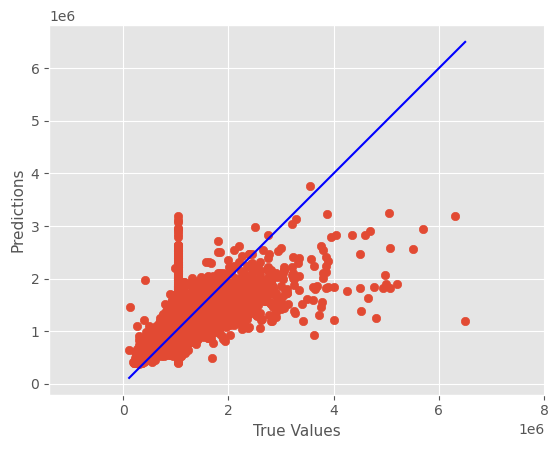

In [26]:
# Obtain the performance metrics
print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test))), 2))

train_score_reg = xgb_model.score(X_train, y_train)
test_score_reg = xgb_model.score(X_test, y_test)

print("The train score for xgb model is {}".format(train_score_reg))
print("The test score for xgb model is {}".format(test_score_reg))


# Compare predicted and actual values

df_comp = pd.DataFrame({'Actual': np.round(y_test.ravel(), 2), 
                   'Predicted': np.round(predicted.ravel(), 2)})
df_comp.head(10)

# Plot he predicted vs actual prices 
plt.scatter(df_comp['Actual'], df_comp['Predicted'])

p1 = max(max(df_comp['Predicted']), max(df_comp['Actual']))
p2 = min(min(df_comp['Predicted']), min(df_comp['Actual']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=11)
plt.ylabel('Predictions', fontsize=11)
plt.axis('equal')

plt.savefig('Images/xgr_pred_true.png')
plt.show()

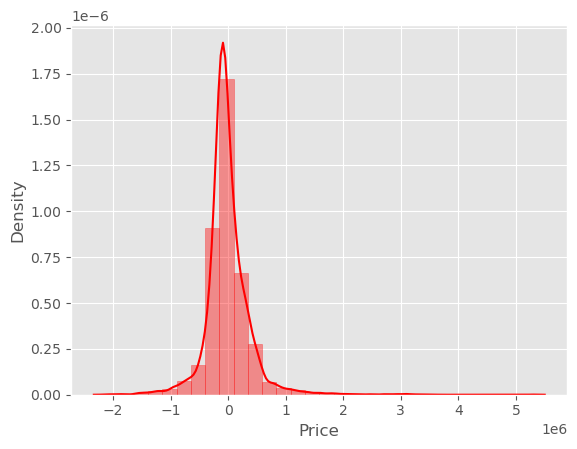

In [27]:
plt.style.use('ggplot')
sns.distplot((y_test-predicted), bins=30, color="r", hist_kws=dict(edgecolor="r"))

plt.savefig('Images/xgr_dist_plot')

### Hyperpareter tuning: Lasso using Pipeline, KFold, GridsearchCV

In [28]:
# Select Target and Features 
X = melbourne_features[num_cols + encoded_cols]
y = melbourne_df.Price

y = y.fillna(y.mean())

In [29]:
# Create training and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.20,
                                                 random_state=42)

In [30]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(0.2, 5, 20)
}

In [31]:
kf= KFold(shuffle=True, random_state=42, n_splits=3)
grid = GridSearchCV(pipeline, param_grid = params, cv=kf, verbose=1, n_jobs = -1)

In [32]:
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/jacob/miniforge3/envs/mlenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.606e+13, tolerance: 6.052e+11
  model = cd_fast.enet_coordinate_descent(
/Users/jacob/miniforge3/envs/mlenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.053e+13, tolerance: 6.121e+11
  model = cd_fast.enet_coordinate_descent(
/Users/jacob/miniforge3/envs/mlenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

0.45274648423939956
{'lasso_regression__alpha': 5.0, 'polynomial_features__degree': 2}


In [33]:
from sklearn.metrics import r2_score
y_predict = grid.predict(X_test)
r2_score(y_test, y_predict)

0.44590040285242893

## Housing Prediction using Deep Neural Networks

### Keras Implentation

In [34]:
# Build DNN model
def train_housing(X_train, y_train, callback):
    
    # Define the model
    model = tf.keras.models.Sequential([ 
        tf.keras.layers.Dense(128, kernel_initializer='normal', input_dim = X_train.shape[1], activation='relu'),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, kernel_initializer='normal', activation=tf.nn.relu),
        tf.keras.layers.Dense(128, kernel_initializer='normal', activation=tf.nn.relu),
        tf.keras.layers.Dense(64, kernel_initializer='normal', activation=tf.nn.relu),
        tf.keras.layers.Dense(1, activation='linear')
    ]) 

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(0.01), 
                  loss='mean_absolute_error', 
                  metrics=['mae']) 
    
    # Fit the model and save the training history
    history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test), callbacks=callback, workers=-1)

        # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    results = model.evaluate(X_test, y_test, batch_size=32)
    print("test loss", results)

    # Generate predictions (probabilities -- the output of the last layer)
    # on new data using `predict`
    print("Generate predictions for 3 samples")
    predictions = model.predict(X_test[:3])
    print(predictions)
    return history

In [35]:
# Instatiate model 
hist = train_housing(X_train, y_train, None)
hist

Epoch 1/250


2022-10-16 15:24:42.736248: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


872/872 [==============================] - 3s 3ms/step - loss: 304355.4688 - mae: 304355.4688 - val_loss: 261372.8750 - val_mae: 261372.8750
Epoch 2/250
872/872 [==============================] - 1s 2ms/step - loss: 275582.8750 - mae: 275582.8750 - val_loss: 259312.5000 - val_mae: 259312.5000
Epoch 3/250
872/872 [==============================] - 1s 2ms/step - loss: 274940.5938 - mae: 274940.5938 - val_loss: 274791.5938 - val_mae: 274791.5938
Epoch 4/250
872/872 [==============================] - 1s 2ms/step - loss: 272600.8750 - mae: 272600.8750 - val_loss: 279752.9375 - val_mae: 279752.9375
Epoch 5/250
872/872 [==============================] - 1s 2ms/step - loss: 273440.6250 - mae: 273440.6250 - val_loss: 263753.9062 - val_mae: 263753.9062
Epoch 6/250
872/872 [==============================] - 1s 2ms/step - loss: 267331.7500 - mae: 267331.7500 - val_loss: 261436.8594 - val_mae: 261436.8594
Epoch 7/250
872/872 [==============================] - 1s 2ms/step - loss: 266148.3438 - mae: 

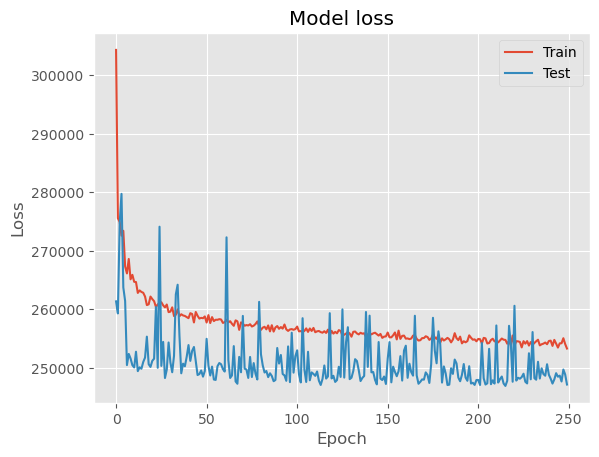

In [36]:
# Create function to plot loss
def plot_loss(loss,val_loss):
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')

plot_loss(hist.history['loss'], hist.history['val_loss'])
plt.savefig('Images/keras_model_loss.png')

Epoch 1/250
872/872 [==============================] - 3s 3ms/step - loss: 304946.8438 - mae: 304946.8438 - val_loss: 258598.9531 - val_mae: 258598.9531
Epoch 2/250
872/872 [==============================] - 2s 2ms/step - loss: 277509.4688 - mae: 277509.4688 - val_loss: 255899.4531 - val_mae: 255899.4531
Epoch 3/250
872/872 [==============================] - 2s 2ms/step - loss: 274414.4688 - mae: 274414.4688 - val_loss: 259434.2812 - val_mae: 259434.2812
Epoch 4/250
872/872 [==============================] - 2s 2ms/step - loss: 272449.5000 - mae: 272449.5000 - val_loss: 258925.8594 - val_mae: 258925.8594
Epoch 5/250
872/872 [==============================] - 2s 2ms/step - loss: 272151.2812 - mae: 272151.2812 - val_loss: 256194.9688 - val_mae: 256194.9688
Epoch 6/250
872/872 [==============================] - 2s 2ms/step - loss: 267806.4375 - mae: 267806.4375 - val_loss: 254986.9844 - val_mae: 254986.9844
Epoch 7/250
872/872 [==============================] - 2s 2ms/step - loss: 267350.

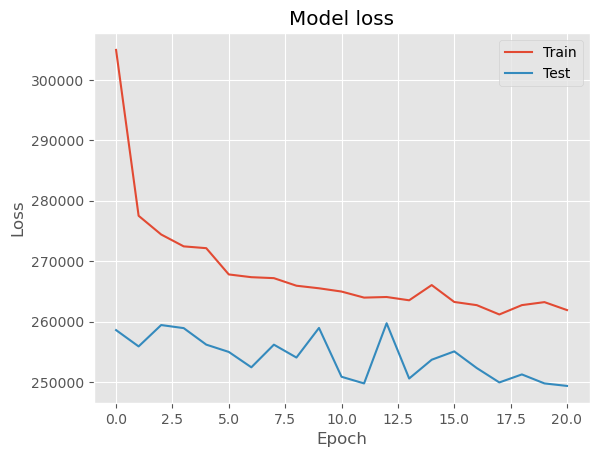

In [37]:
# Create callback for early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Instatiate model 
hist = train_housing(X_train, y_train, callback)

# Plot Loss of early stoppage
plot_loss(hist.history['loss'], hist.history['val_loss'])
plt.savefig('Images/keras_model_loss_early.png')

### PyTorch Implementation

In [38]:
# Select Target and Features 
target = melbourne_df['Price'].fillna(melbourne_df['Price'].mean())
X = melbourne_features[num_cols + encoded_cols].to_numpy()
y = target.to_numpy()

# Create training and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.20,
                                                 random_state=42)
# Scale numerical data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)     


In [39]:
torch.manual_seed(42)

In [40]:
class DeepNeuralNet(torch.nn.Module):
    def __init__(self, features):
        super(DeepNeuralNet, self).__init__()
        self.hidden1 = torch.nn.Linear(features, 128)  
        self.drop_out = nn.Dropout(0.2)
        self.hidden2 = torch.nn.Linear(128, 256)    
        self.hidden3 = torch.nn.Linear(256, 128) 
        self.hidden4 = torch.nn.Linear(128, 64)  
        self.predict = torch.nn.Linear(64, 1) 

    def forward(self, x):
        
        x = self.hidden1(x)
        x = nn.functional.relu(x)

        x = self.hidden2(x)
        x = nn.functional.relu(x)

        x = self.hidden3(x)
        x = nn.functional.relu(x)

        x = self.hidden4(x)
        x = nn.functional.relu(x)

        x = self.predict(x)

        return x 

In [41]:
# Instatiate model 
dnn = DeepNeuralNet(features=X_train.shape[1])
dnn

DeepNeuralNet(
  (hidden1): Linear(in_features=17, out_features=128, bias=True)
  (drop_out): Dropout(p=0.2, inplace=False)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (hidden3): Linear(in_features=256, out_features=128, bias=True)
  (hidden4): Linear(in_features=128, out_features=64, bias=True)
  (predict): Linear(in_features=64, out_features=1, bias=True)
)

In [42]:
# Define Loss and Optimizer
optimizer = torch.optim.Adam(dnn.parameters(), lr = 0.01)
criterion = torch.nn.L1Loss()

In [43]:
# Convert train and test data to 
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float).view(-1, 1)


# Create iterator to iterate training and testing data by batch
batch_size = 32
datasets = torch.utils.data.TensorDataset(X_train, y_train)
validsets = torch.utils.data.TensorDataset(X_test, y_test)

train_iter = torch.utils.data.DataLoader(datasets, batch_size=batch_size, shuffle=True)
valid_iter = torch.utils.data.DataLoader(validsets, batch_size=batch_size)

In [44]:
import time
start_time = time.time()

num_epochs = 250

loss_hist = [0] * num_epochs
valid_loss_hist = [0] * num_epochs

for epoch in range(num_epochs):
    
    # Mini batch learning
    for x_batch, y_batch in train_iter:

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = dnn(x_batch)

        # Calculating the Loss using Backward propogation
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        # Keep track of training loss for later visualization
        loss_hist[epoch] += loss.item() * y_batch.size(0)

    loss_hist[epoch] /= len(train_iter.dataset)

    for x_batch, y_batch in valid_iter:

        outputs = dnn(x_batch)
        val_loss = criterion(outputs, y_batch)
        # Keep track of training loss for later visualization
        valid_loss_hist[epoch] += val_loss.item() * y_batch.size(0)

    valid_loss_hist[epoch] /= len(valid_iter.dataset)
    
    if epoch % 10 == 0:    
        print(f'Epoch: {epoch} loss: {loss.item():10.8f}')

print(f'Epoch: {epoch}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

Epoch: 0 loss: 228013.23437500
Epoch: 10 loss: 489630.65625000
Epoch: 20 loss: 213777.23437500
Epoch: 30 loss: 446172.18750000
Epoch: 40 loss: 203885.75000000
Epoch: 50 loss: 243744.17187500
Epoch: 60 loss: 144212.75000000
Epoch: 70 loss: 256186.31250000
Epoch: 80 loss: 218904.06250000
Epoch: 90 loss: 232574.34375000
Epoch: 100 loss: 389149.78125000
Epoch: 110 loss: 95366.49218750
Epoch: 120 loss: 327896.18750000
Epoch: 130 loss: 231509.60937500
Epoch: 140 loss: 254025.15625000
Epoch: 150 loss: 293219.43750000
Epoch: 160 loss: 186794.34375000
Epoch: 170 loss: 158597.98437500
Epoch: 180 loss: 200105.09375000
Epoch: 190 loss: 259940.96875000
Epoch: 200 loss: 248620.03125000
Epoch: 210 loss: 226545.00000000
Epoch: 220 loss: 188278.28125000
Epoch: 230 loss: 314869.34375000
Epoch: 240 loss: 308044.31250000
Epoch: 249  loss: 182596.93750000

Duration: 226 seconds


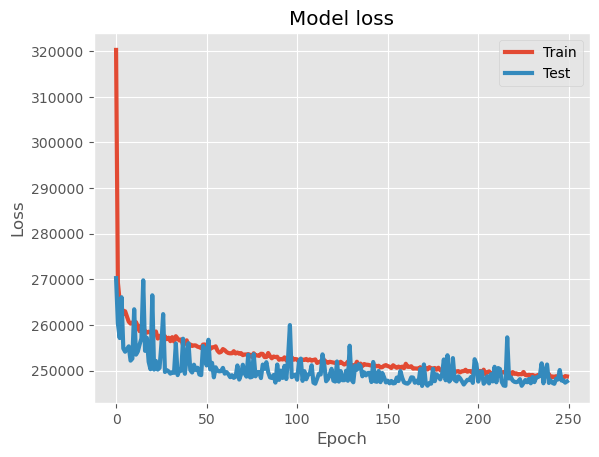

In [45]:
# Create function to plot loss
def plot_loss():
  plt.plot(loss_hist, lw=3)
  plt.plot(valid_loss_hist, lw=3)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.savefig('Images/pytorch_model_loss.png')

plot_loss()

In [46]:
with torch.no_grad():
		y_val = dnn(X_test)
		loss = criterion(y_val, y_test)
print(f'Mean Absolute Error: {loss:.8f}')

Mean Absolute Error: 247644.29687500
